In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data/stud.csv")
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [52]:
columns = df.columns.tolist()
columns = columns[:-3]
for i in range(len(columns)):
     print("Categories in " + columns[i] + " variable : ",  end = "")
     print(df[columns[i]].unique())


Categories in gender variable : ['female' 'male']
Categories in race_ethnicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable : ['standard' 'free/reduced']
Categories in test_preparation_course variable : ['none' 'completed']


In [65]:
numerical_features = []
categorical_features = []
columns = df.columns.tolist()
for i in range(len(columns)):
    if df[columns[i]].dtype != "O" :
        numerical_features.append(columns[i])
     
    if df[columns[i]].dtype == "O" :
        categorical_features.append(columns[i])
print("There are " + str(len(numerical_features)) + " numerical features : " + str(numerical_features))
print("There are " + str(len(categorical_features)) + " categorical features : " + str(categorical_features))



There are 3 numerical features : ['math_score', 'reading_score', 'writing_score']
There are 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [66]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [67]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


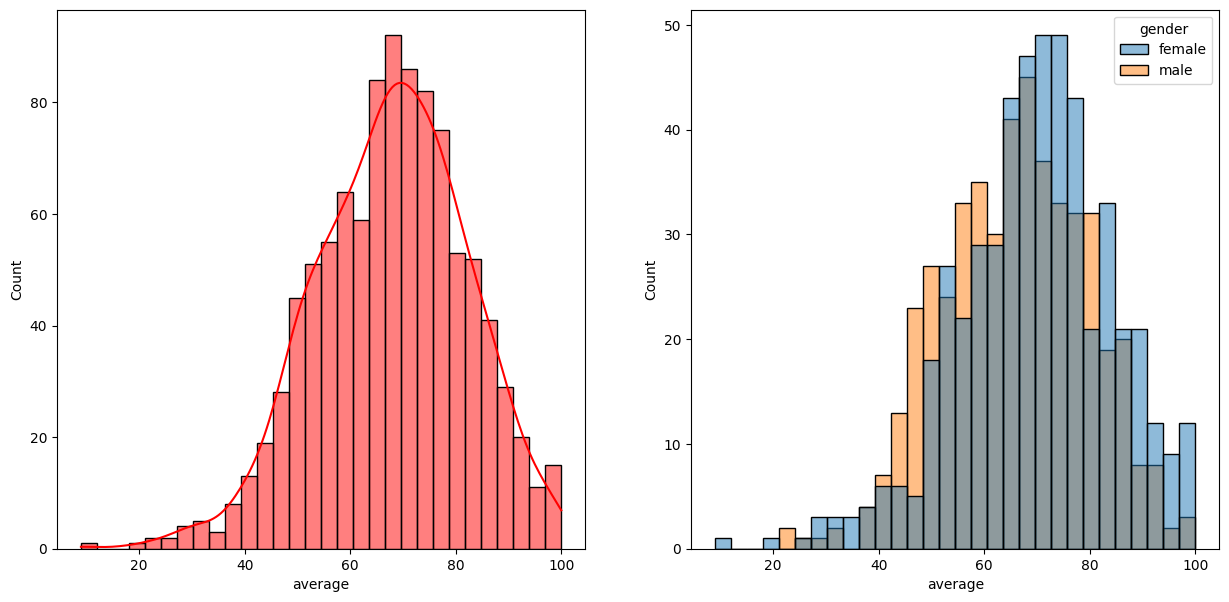

In [77]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x="average", bins=30, kde=True, color='r')
plt.subplot(122)
sns.histplot(data=df, x="average", bins = 30, hue='gender')
plt.show()

<Axes: xlabel='average', ylabel='Count'>

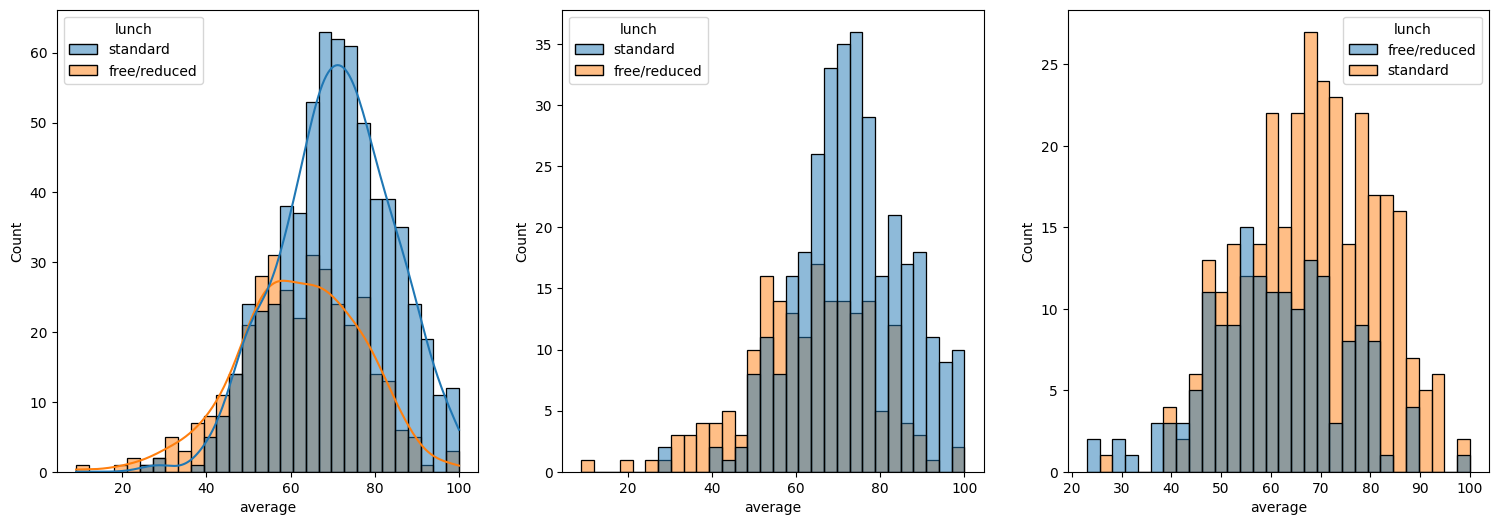

In [93]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average',kde=True, bins=30, hue='lunch', color='r')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, hue='lunch')

In [89]:
df.describe()

,math_score,reading_score,writing_score,total_score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


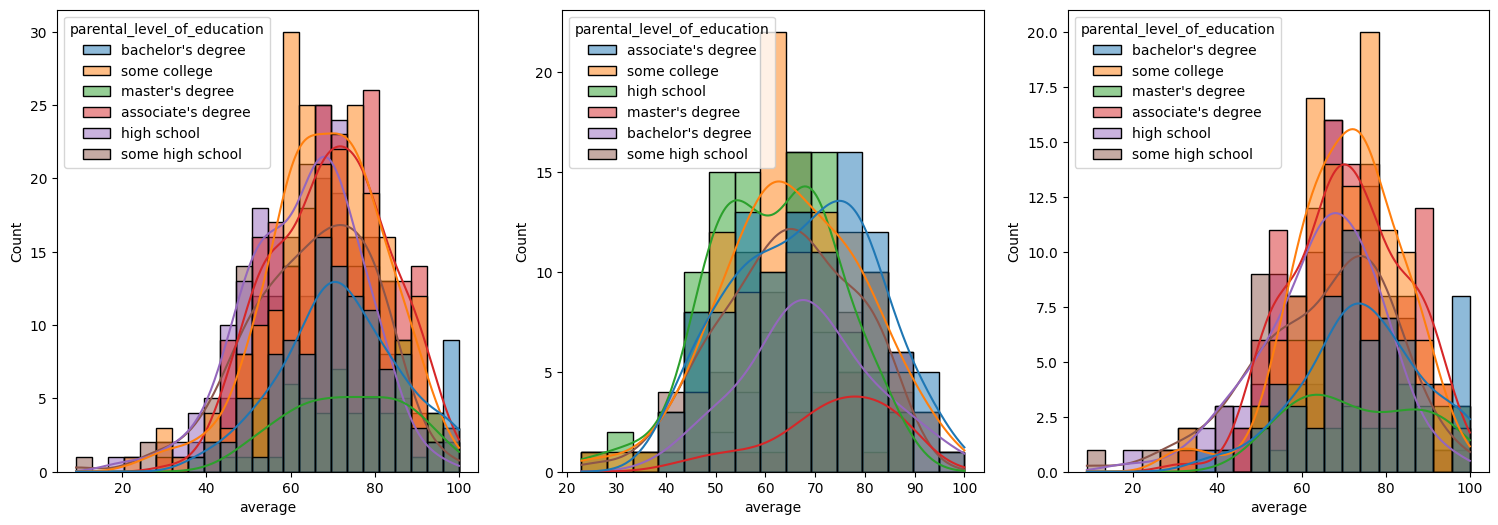

In [92]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

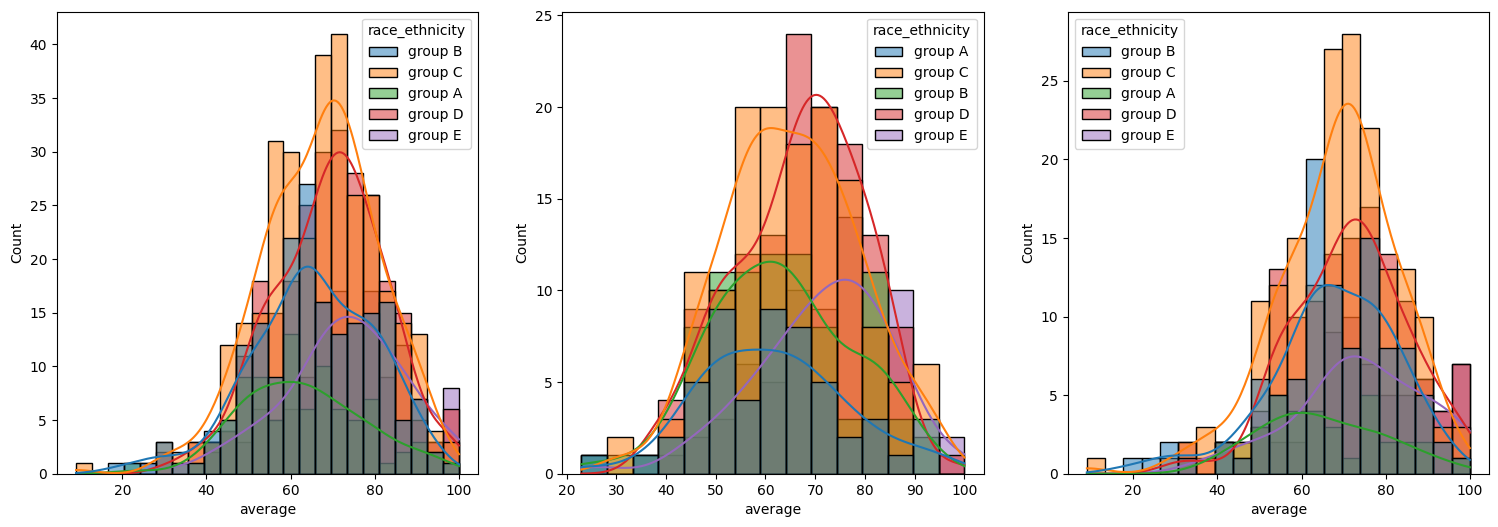

In [94]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

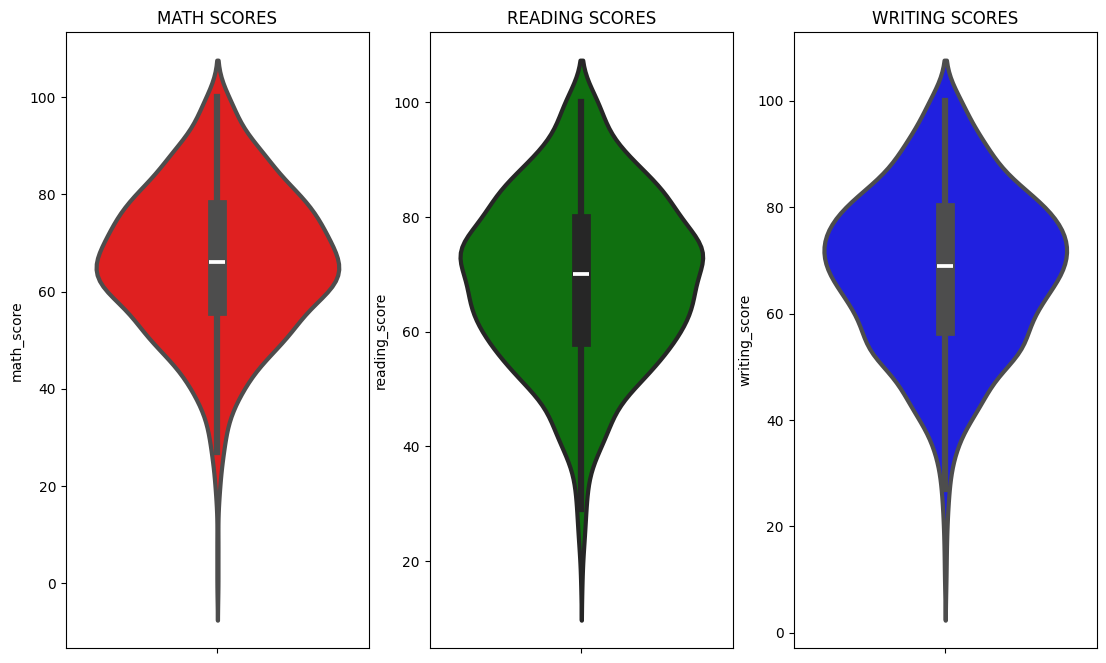

In [95]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()